[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Lecture_Code/7_2_statsmodels.ipynb)

Load all the libraries needed. 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

Load in housing data

In [11]:
housing = pd.read_csv("https://richardson.byu.edu/220/newhousing.csv")
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,5250000,5500,3,2,1,1,0,1,0,0,0,0,1,0,1833.333333,0.666667
1,4480000,4040,3,1,2,1,0,0,0,0,1,0,1,0,1346.666667,0.333333
2,3570000,3640,2,1,1,1,0,0,0,0,0,0,0,1,1820.000000,0.500000
3,2870000,3040,2,1,1,0,0,0,0,0,0,0,0,1,1520.000000,0.500000
4,3570000,4500,2,1,1,0,0,0,0,0,0,0,0,0,2250.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,4403000,4880,3,1,1,1,0,0,0,0,2,1,0,1,1626.666667,0.333333
541,2660000,2000,2,1,2,1,0,0,0,0,0,0,1,0,1000.000000,0.500000
542,4480000,8250,3,1,1,1,0,0,0,0,0,0,0,0,2750.000000,0.333333
543,5110000,11410,2,1,2,1,0,0,0,0,0,1,0,0,5705.000000,0.500000


Visualize size versus price

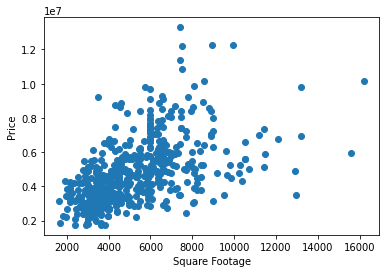

In [12]:
plt.scatter(housing.area,housing.price)
plt.xlabel("Square Footage")
plt.ylabel("Price")
plt.show()

Visualize the relationship between price, size, and if there is air conditioning

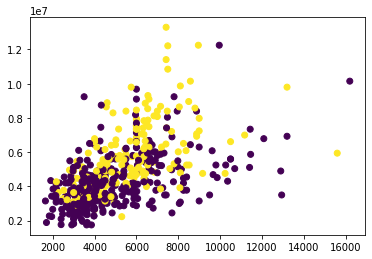

In [13]:
plt.scatter(housing.area,housing.price,c = housing.airconditioning.astype("category").cat.codes)


Buils a linear model using statsmodels, use the equations similar to bambi. 

In [14]:
mod = smf.ols("price ~ area + airconditioning",data = housing).fit()
mod.params

Intercept          2.288390e+06
area               3.946726e+02
airconditioning    1.411808e+06
dtype: float64

Visualize the effects. 

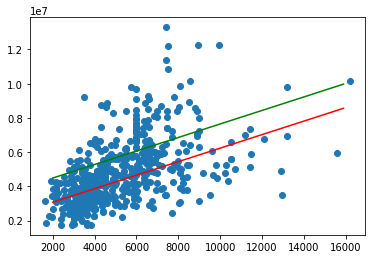

In [15]:
Beta_0 = mod.params[0]
Beta_1 = mod.params[1]
Beta_2 = mod.params[2]

plt.scatter(housing.area,housing.price)

x_axis = np.arange(2000,16000,100)

plt.plot(x_axis,Beta_0 + Beta_1*x_axis,color = "red")
plt.plot(x_axis,Beta_0 + Beta_1*x_axis + Beta_2,color = "green")
plt.show()

Add in an interaction

In [16]:
mod2 = smf.ols("price ~ area + airconditioning + area:airconditioning",data = housing).fit()
mod2.params

Intercept               2.497871e+06
area                    3.512399e+02
airconditioning         5.307463e+05
area:airconditioning    1.580250e+02
dtype: float64

Shortcut, does interaction plus all the individual terms

In [17]:
mod2 = smf.ols("price ~ area*airconditioning",data = housing).fit()
mod2.params

Intercept               2.497871e+06
area                    3.512399e+02
airconditioning         5.307463e+05
area:airconditioning    1.580250e+02
dtype: float64

Visualize the effects. 

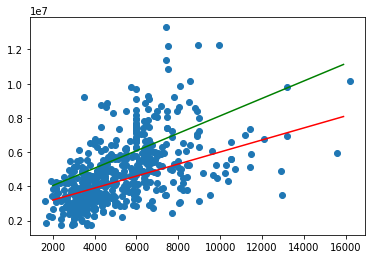

In [18]:
Beta_0 = mod2.params[0]
Beta_1 = mod2.params[1]
Beta_2 = mod2.params[2]
Beta_3 = mod2.params[3]

plt.scatter(housing.area,housing.price)

x_axis = np.arange(2000,16000,100)

plt.plot(x_axis,Beta_0 + Beta_1*x_axis,color = "red")
plt.plot(x_axis,Beta_0 + Beta_2 + (Beta_1+Beta_3)*x_axis,color = "green")
plt.show()

Split into test and train, no need to split both X and y in this case. 

In [19]:
from sklearn.model_selection import train_test_split
housing_train, housing_test = train_test_split(housing, test_size=0.3, random_state=4321)

formula = "price ~ area + bathrooms + bedrooms + stories + mainroad + basement + airconditioning + guestroom+hotwaterheating+parking+unfurnished"
mod_all = smf.ols(formula,data=housing_train).fit()
mod_all.params

Intercept         -1.106642e+05
area               2.766551e+02
bathrooms          1.055004e+06
bedrooms           1.435370e+05
stories            3.920419e+05
mainroad           3.814957e+05
basement           5.233012e+05
airconditioning    9.969937e+05
guestroom          3.714491e+05
hotwaterheating    1.026697e+06
parking            2.624979e+05
unfurnished       -4.821983e+05
dtype: float64

How good is this model with all the parameters?

In [20]:
out_sample_preds = mod_all.predict(housing_test)
from sklearn.metrics import mean_squared_error, r2_score

rmse_all = np.sqrt(mean_squared_error(housing_test.price,out_sample_preds))
rmse_all

1050695.1555303799

Now fit a model with many higher order terms. Note that functions of variables can be used directly into the formula. For example, we use np.power(). Can also use np.log() or any other function. 

In [21]:
formula_full = formula + "+ area:airconditioning + np.power(area,2) + np.power(bedrooms,2) + np.power(bathrooms,2) + area:unfurnished + airconditioning:hotwaterheating"
mod_full = smf.ols(formula_full,data=housing_train).fit()
mod_full.params

Intercept                         -4.276890e+05
area                               3.563072e+02
bathrooms                          4.690331e+05
bedrooms                           5.447762e+05
stories                            3.682698e+05
mainroad                           3.849089e+05
basement                           5.228151e+05
airconditioning                    2.575883e+05
guestroom                          3.240153e+05
hotwaterheating                    1.213134e+06
parking                            2.236589e+05
unfurnished                       -4.409960e+05
area:airconditioning               1.316652e+02
np.power(area, 2)                 -7.723700e-03
np.power(bedrooms, 2)             -5.890822e+04
np.power(bathrooms, 2)             1.692973e+05
area:unfurnished                  -9.792457e+00
airconditioning:hotwaterheating   -1.705399e+06
dtype: float64

Do these higher order terms improve the model?

In [24]:
out_sample_preds = mod_full.predict(housing_test)

rmse_full = np.sqrt(mean_squared_error(housing_test.price,out_sample_preds))
rmse_full

1045329.1671949797

In [25]:
mod_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     43.86
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           3.84e-77
Time:                        16:30:13   Log-Likelihood:                -5839.1
No. Observations:                 381   AIC:                         1.171e+04
Df Residuals:                     363   BIC:                         1.179e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                       -4.277e+05   8.69e+05     -0.492      0.623   -2.14e+06    1.28e+06
area                              356.3072    119.185      2.990      0.003     121.927     590.688
bathrooms                         4.69e+05   6.05e+05      0.775      0.439   -7.21e+05    1.66e+06
bedrooms                         5.448e+05   4.88e+05      1.115      0.265   -4.16e+05    1.51e+06
stories                          3.683e+05   8.51e+04      4.326      0.000    2.01e+05    5.36e+05
mainroad                         3.849e+05   1.89e+05      2.035      0.043     1.3e+04    7.57e+05
basement                         5.228e+05   1.42e+05      3.687      0.000    2.44e+05    8.02e+05
airconditioning                  2.576e+05   4.37e+05      0.589      0.556   -6.03e+05    1.12e+06
guestroom                         3.24e+05    1.7e+05      1.909      0.057   -9817.162    6.58e+05
hotwaterheating                  1.213e+06   2.86e+05      4.241      0.000    6.51e+05    1.78e+06
parking                          2.237e+05   7.39e+04      3.027      0.003    7.84e+04    3.69e+05
unfurnished                      -4.41e+05   3.22e+05     -1.368      0.172   -1.08e+06    1.93e+05
area:airconditioning              131.6652     74.216      1.774      0.077     -14.283     277.613
np.power(area, 2)                  -0.0077      0.008     -0.925      0.356      -0.024       0.009
np.power(bedrooms, 2)           -5.891e+04   7.47e+04     -0.788      0.431   -2.06e+05     8.8e+04
np.power(bathrooms, 2)           1.693e+05   1.74e+05      0.974      0.331   -1.72e+05    5.11e+05
area:unfurnished                   -9.7925     58.814     -0.166      0.868    -125.452     105.867
airconditioning:hotwaterheating -1.705e+06    1.2e+06     -1.422      0.156   -4.06e+06    6.53e+05
==============================================================================
Omnibus:                       51.413   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.002
Skew:                           0.706   Prob(JB):                     1.76e-25
Kurtosis:                       5.278   Cond. No.                     8.85e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.85e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""